## Portrait-GANerator
* Set up code environment

  * Before running the pipline in Colab, make sure that GPU is used by checking:
  `Runtime --> Change runtime type --> Hardware accelerator --> GPU`.

  * Connect Colab to google drive account.

  * Clone Github repository by running `!git clone https://github.com/FangfeiLi05/Insight_Project.git`.

  * `cd` to the root directory (the folder containing `README.md`).

  * Intstall dependencies by running `!pip install -r requirements.txt`.


* Train a multivariate multidependents logistic regression model to simultaneously get all normalized and orthogonal feature axes (`Gender, Makeup, Glasses, Age, Smile, Anger, Contempt, Disgust, Fear, Neutral, Sadness, Surprise, Beard, Bald, BlondHair, BlackHair`) in the latent space, by running `!python feature_axis.py`. The output file `feature_axis.h5` is saved in the folder `~/data/`.

* Train a ResNet or a EfficientNet to convert a image to a latent vector (18*512), that is used as the initial value in encoding the image to a latent vector, by running `!python train_resnet.py --test_size 256 --batch_size 1024 --max_patience 1`, or `!python train_effnet.py --test_size 256 --batch_size 1024 --loop 1 --max_patience 1`. The output file `finetuned_resnet.h5` or `finetuned_effnet.h5` is saved in the folder `~/data/`.

*  Encode the image into the latent vector, by running `!python image_encoder.py --load_resnet=data/finetuned_resnet --use_vgg_loss=1 images_raw/ images_aligned/ images_generate/ images_latent/`, or `!python image_encoder.py --load_effnet=data/finetuned_effnet --use_vgg_loss=1 images_raw/ images_aligned/ images_generate/ images_latent/`. The input original images are stored in the folder `~/images_raw/`. The output aligned images are stored in the folder `~/images_aligned/`. The output reconstructed images are stored in the folder `~/images_generate/`. The output latent vectors of images are stored in the folder `~/images_latent/`.

* Tune facial features by moving the latent vector in the latent space, then reconstruct the image using the pretrained StyleGAN generator.


In [8]:
!git clone https://github.com/FangfeiLi05/Insight_Project.git

Cloning into 'Insight_Project'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 1621 (delta 32), reused 47 (delta 15), pack-reused 1556
Receiving objects: 100% (1621/1621), 139.10 MiB | 13.19 MiB/s, done.
Resolving deltas: 100% (351/351), done.


In [9]:
cd Insight_Project/

/content/drive/My Drive/Insight_Project


In [10]:
!pip install -r requirements.txt

     |████████████████████████████████| 13.9MB 2.7MB/s 
     |████████████████████████████████| 10.1MB 30.9MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 378kB 43.9MB/s 
     |████████████████████████████████| 377.0MB 45kB/s 
     |████████████████████████████████| 4.3MB 32.7MB/s 
     |████████████████████████████████| 28.7MB 33.6MB/s 
     |████████████████████████████████| 2.1MB 30.4MB/s 
     |████████████████████████████████| 3.1MB 38.2MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 3.2MB 32.8MB/s 
     |████████████████████████████████| 491kB 50.0MB/s 
  Created wheel for dlib: filename=dlib-19.18.0-cp36-cp36m-linux_x86_64.whl size=4091608 sha256=14d544c04daba93eea0d39077a68cab188c0dea1a8795a6ed78ceebdf10bfcfc
  Stored in directory: /root/.cache/pip/wheels/ab/e9/6b/5206171e6a24d8cb6653936ccfd656b7d6f6c631c1b5f93970
  Create

In [7]:
!python feature_axis.py

Using TensorFlow backend.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2019-11-15 09:59:03.944905: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:40] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.

Train on 14214 samples, validate on 6093 samples
Epoch 1/100
14214/14214 [==============================] - 3s 204us/step - loss: 0.2416 - val_loss: 0.2299
Epoch 2/100
14214/14214 [==============================] - 3s 212us/step - loss: 0.2236 - val_loss: 0.2264
Epoch 3/100
14214/14214 [==============================] - 3s 195us/step - loss: 0.2212 - val_loss: 0.2295
Epoch 4/100
14214/14214 [==============================] - 3s 187us/step - loss: 0.2201 - val_loss: 0.2332
Epoch 5/100
14214/14214 [==============================] - 3s 182us/step - loss: 0.2193 - val_loss: 0.2300
Epoch 6/100
14214/14214 [==============================] - 3s 185us/step - lo

In [2]:
!python train_effnet.py --test_size 256 --batch_size 1024 --loop 1 --max_patience 1





Using TensorFlow backend.


Loading model
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
efficientnet-b1 (Model)      (None, 8, 8, 1280)        6575232   
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 8, 8, 576)         737856    
_________________________________________________________________
reshape_1 (Reshape)          (None, 192, 192)          0         
_________________________________________________________________
locally_connected1d_1 (Local (None, 192, 96)           3557376   
________________________________________

In [3]:
!python image_encoder.py --load_effnet=data/finetuned_effnet --use_vgg_loss=1 images_raw/ images_aligned/ images_generate/ images_latent/


Using TensorFlow backend.



Aligning 000001.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result images_aligned/000001_01.png


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

2019-11-15 11:26:00.212234: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.


  0% 0/1 [00:00<?, ?it/s]Loading ResNet Model:

  0% 0/100 [00:00<?, ?it/s]WARNING:tensorflow:From /content/drive/My Drive/Insight_Project/encoder/encoder/perceptual_model.py:238: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

Instru

Original photo...


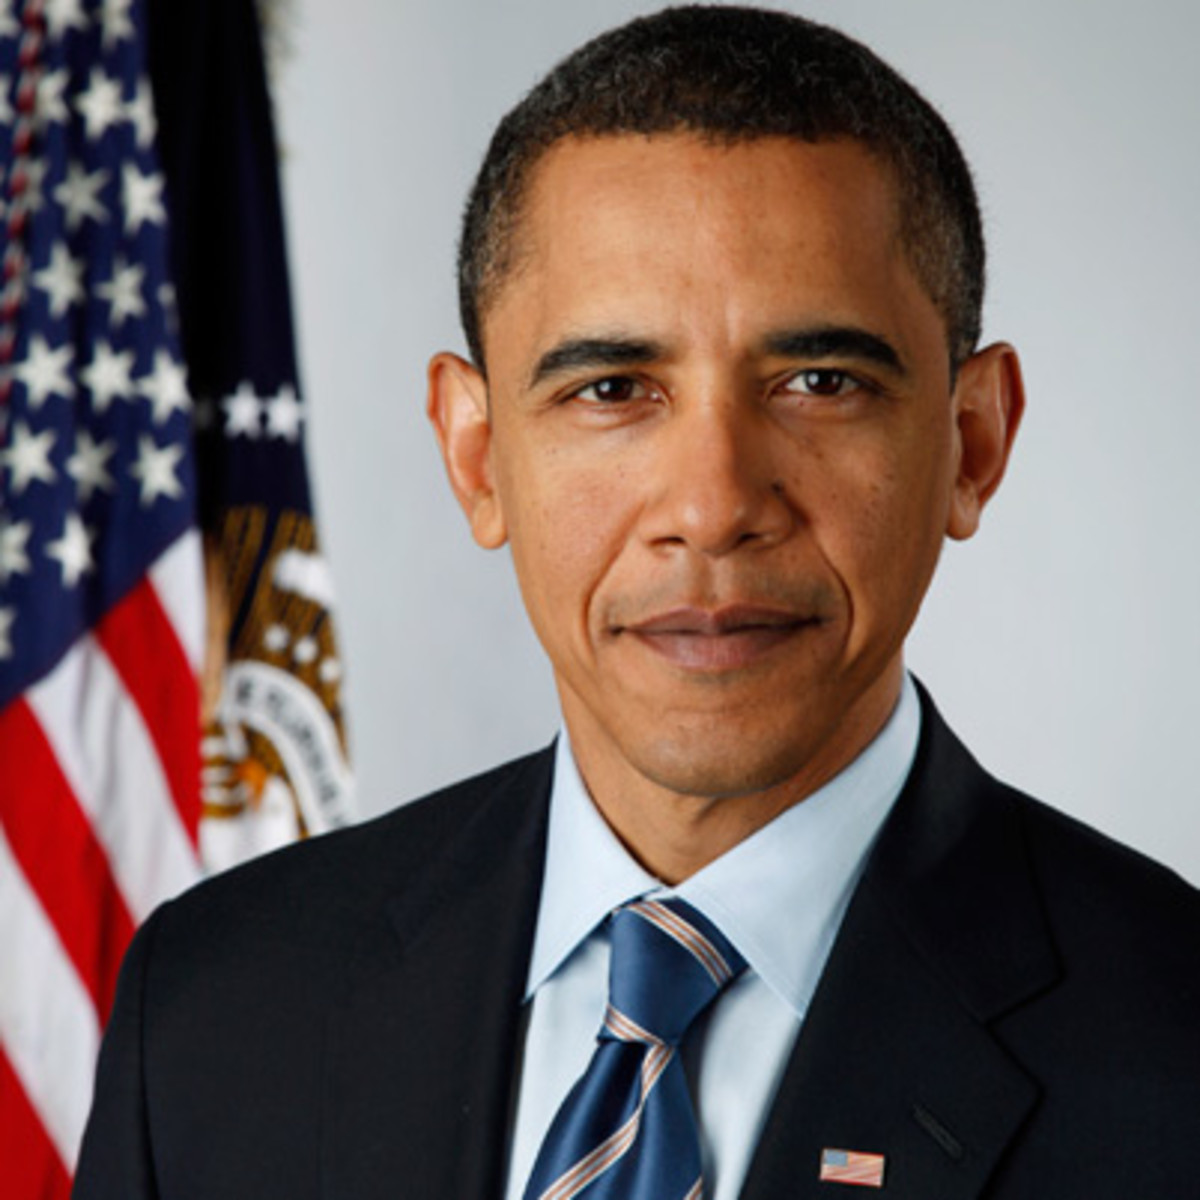



Aligned photo...


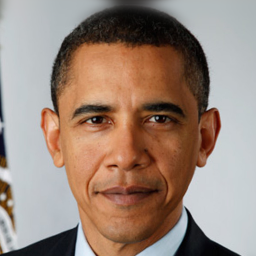



Reconstructed photo...


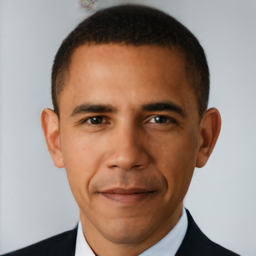

In [6]:
from PIL import Image
import numpy as np
from manipulate_latent import latent_to_image

print('Original photo...')
display(Image.open('./images_raw/000001.jpg'))
print('\n')

print('Aligned photo...')
display(Image.open('./images_aligned/000001_01.png').resize((256,256)))
print('\n')

print('Reconstructed photo...')
image_latent = np.load('./images_latent/000001_01.npy')
latent_to_image(image_latent)


Feature-tuned photo...


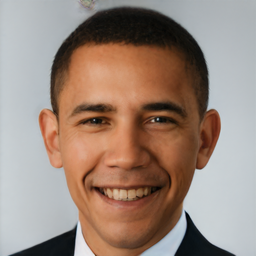

In [5]:
import pandas as pd
from manipulate_latent import tune_latent

feature_axis_DataFrame = pd.read_hdf('./data/feature_axis.h5', 'df')
feature_axis_array = np.array(feature_axis_DataFrame)

i = 4
direction = feature_axis_array[:,i].reshape((18, 512))
coeff = 4

print('Feature-tuned photo...')
image_latent_tuned = tune_latent(image_latent, direction, coeff, list(range(8)))
latent_to_image(image_latent_tuned)


In [ ]:
#Build a GUI interface
import os
import glob
import sys
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import PIL
import ipywidgets
import io
from manipulate_latent import latent_to_image
from manipulate_latent import latent_to_imageRGB

feature_axis_DataFrame = pd.read_hdf('./data/feature_axis.h5', 'df')
feature_axis_array = np.array(feature_axis_DataFrame)
feature_label_list = list(feature_axis_DataFrame.columns)
feature_label_list = [i[0].capitalize()+i[1:] for i in feature_label_list]
num_feature = len(feature_label_list)


def img_to_bytes(image_RGB):
    imgObj = PIL.Image.fromarray(image_RGB)
    imgByteArr = io.BytesIO()
    imgObj.save(imgByteArr, format='PNG')
    imgBytes = imgByteArr.getvalue()
    return imgBytes


image_latent = np.load('./images_latent/000001_01.npy')
image_RGB = latent_to_imageRGB(image_latent)
w_img = ipywidgets.widgets.Image(value=img_to_bytes(image_RGB), fromat='png', width=512, height=512)


class GuiCallback(object):
    counter = 0
    #dlatent = z_sample
    def __init__(self):
        self.dlatent_original = image_latent.copy()
        self.dlatent = image_latent.copy()
        self.feature_axis = feature_axis_array
    
    def image_generate(self):        
        image_RGB = latent_to_imageRGB(self.dlatent)
        x_byte = img_to_bytes(image_RGB)
        w_img.value = x_byte
        
    def feature_tune(self, event, idx_feature, step_size=0.1, layers=list(range(0,8))):
        tempt = np.reshape(self.feature_axis[:, idx_feature], (18,512))
        self.dlatent[layers,:] += tempt[layers,:] * step_size
        self.image_generate()
    
    def image_reset(self, event):
        self.dlatent = self.dlatent_original.copy()
        self.image_generate()

guicallback = GuiCallback()


step_size = 1
def create_button(idx_feature, width=100, height=75):
    """ function to built button groups for one feature """
    w_feature = ipywidgets.widgets.ToggleButton(value=False, description=feature_label_list[idx_feature], 
                                          tooltip='{}, Click to mark that this feature has be tuned'.format(feature_label_list[idx_feature]), 
                                          layout=ipywidgets.Layout(height='{:.0f}px'.format((height-6*3)/2), 
                                                                   width='{:.0f}px'.format(width-6*2), 
                                                                   margin='6px 6px 3px 6px', align_items='stretch'))
    w_neg = ipywidgets.widgets.Button(description='-', layout=ipywidgets.Layout(height='{:.0f}px'.format((height-6*3)/2), 
                                                               width='{:.0f}px'.format((width-6*3)/2), 
                                                               margin='3px 3px 6px 6px', align_items='stretch')) 
    w_pos = ipywidgets.widgets.Button(description='+', layout=ipywidgets.Layout(height='{:.0f}px'.format((height-6*3)/2), 
                                                               width='{:.0f}px'.format((width-6*3)/2), 
                                                               margin='3px 6px 6px 3px', align_items='stretch'))
    
    #w_feature.on_click(lambda event: guicallback.feature_reset(event, idx_feature))
    w_neg.on_click(lambda event: guicallback.feature_tune(event, idx_feature, step_size =- step_size))
    w_pos.on_click(lambda event: guicallback.feature_tune(event, idx_feature, step_size =+ step_size))
    
    button_group = ipywidgets.VBox([w_feature, ipywidgets.HBox([w_neg, w_pos])],
                                  layout=ipywidgets.Layout(border='1px solid gray', margin = '1px'))
    
    return button_group


list_buttons = []
for idx_feature in range(num_feature):
    list_buttons.append(create_button(idx_feature))

    
def arrange_buttons(list_buttons, ncol=4):
    num = len(list_buttons)
    layout_all_buttons = ipywidgets.VBox([ipywidgets.HBox(list_buttons[i*ncol:(i+1)*ncol]) for i in range(num//ncol+int(num%ncol>0))])
    return layout_all_buttons
    

w_button_reset = ipywidgets.widgets.Button(tooltip='Reset to untuned photo',  
                                           description='Image Reset', button_style='success',
                                           layout=ipywidgets.Layout(height='60px', 
                                                                    width='194px', 
                                                                    margin='6px 6px 6px 6px', 
                                                                    align_items='stretch'))
w_button_reset.on_click(guicallback.image_reset)

w_box = ipywidgets.HBox([w_img, ipywidgets.VBox([w_button_reset, arrange_buttons(list_buttons)])], 
                        layout=ipywidgets.Layout(height='1048}px', width='1096px'))



print('Click +/- to tune feature')
display(w_box)
